In [10]:
import jax.numpy as jnp
from jax.lax import fori_loop
from jax.lax import scan
from jax import grad 

In [11]:
import jax
jax.__version__

'0.2.3'

### using fori_loop

In [12]:
def f_lp(i,x):
    x=1.0/(1.0+x)
    return x

In [13]:
def g_lp(x):
    return fori_loop(0,2,f_lp,x)

In [14]:
h_lp=grad(g_lp)

In [15]:
try:
    h(1.0)
except:
    print("Error. fori_loop cannot use autodiff for verion "+jax.__version__)

Error. fori_loop cannot use autodiff for verion 0.2.3


In [16]:
#@jit
def f(x,null):
    x=1.0/(1.0+x)
    return x,null

In [17]:
#@jit
def g(x0):
    x,null=scan(f,x0,None,3)
    return x

In [18]:
from jax import vmap
from jax import jit
h=jit(vmap(grad(g)))
xarr=jnp.linspace(0,1,100)
harr=h(xarr)

RuntimeError: Internal: Failed to load in-memory CUBIN: CUDA_ERROR_OUT_OF_MEMORY: out of memory

In [24]:
#if you wanna measure computing time
%timeit h(xarr)

53.3 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
#checking with sympy
import sympy as sp
x = sp.Symbol('x')
def f_sp(x):
    return 1/(1+x)
ans=sp.diff(f_sp(f_sp(f_sp(x))),x)

In [19]:
ans

-1/((1 + 1/(1 + 1/(x + 1)))**2*(1 + 1/(x + 1))**2*(x + 1)**2)

In [20]:
sp.latex(ans)

'- \\frac{1}{\\left(1 + \\frac{1}{1 + \\frac{1}{x + 1}}\\right)^{2} \\left(1 + \\frac{1}{x + 1}\\right)^{2} \\left(x + 1\\right)^{2}}'

In [21]:
h_sp=lambda x:-(f_sp(f_sp(f_sp(x))))**2*(f_sp(f_sp(x)))**2*(f_sp(x))**2

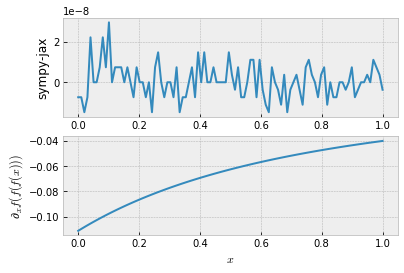

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

fig=plt.figure()
ax=fig.add_subplot(211)
plt.plot(xarr,h_sp(xarr)-harr)
plt.ylabel("sympy-jax")
ax=fig.add_subplot(212)
plt.plot(xarr,harr)
plt.xlabel("$x$")
plt.ylabel("$\partial_x f(f(f(x)))$")
plt.savefig("scan1.pdf")
plt.show()
#plt.yscale("log")

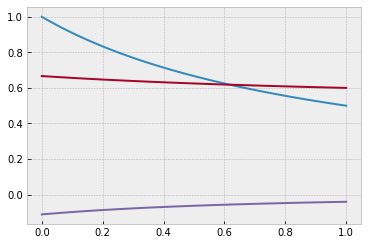

In [23]:
plt.plot(xarr,f(xarr,0)[0])
plt.plot(xarr,g(xarr))
plt.plot(xarr,h(xarr))